In [1]:
from glob import glob
import sys
import os
# import psutil
from os.path import join, dirname
from os.path import getsize
import pickle
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
from nilearn import plotting as nplt
from nilearn import image as niimg
import nilearn.decoding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

In [2]:
GA = mydef.GA()

In [3]:
from datetime import date
today = date.today().strftime("%Y%m%d")

In [4]:
## background image
img_bg = join(GA.dir_mask,'mni152_2009bet.nii.gz')

# ROI list

## Movement-related ROIs from localizer

In [5]:
## ROI
GA.roi_imgs = {}
path_list = sorted(glob(join(GA.dir_mask,'localizer','n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = niimg.load_img(path)
GA.roi_imgs

{'n200_c1-1_L_M1': <nibabel.nifti1.Nifti1Image at 0x7f84401a78e0>,
 'n200_c1-2_L_S1': <nibabel.nifti1.Nifti1Image at 0x7f84401a7bb0>,
 'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f84401a7790>,
 'n200_c1_R_SPL': <nibabel.nifti1.Nifti1Image at 0x7f84712a7a60>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7f84712a7be0>,
 'n200_c2_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7f847134d3a0>,
 'n200_c3_R_MTG': <nibabel.nifti1.Nifti1Image at 0x7f847134d370>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f847134d910>,
 'n200_c4_L_IFG': <nibabel.nifti1.Nifti1Image at 0x7f847134dcd0>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7f847134dbe0>,
 'n200_c5_L_SPL': <nibabel.nifti1.Nifti1Image at 0x7f8471350400>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7f8471350760>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7f8471350160>,
 'n200_c6_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7f8471350f70>,
 'n200_c7_L_Thalamus': <nibabel

In [6]:
key_list = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
temp = {}
for key in key_list:
    temp[key] = GA.roi_imgs[key]
GA.roi_imgs = temp
GA.roi_imgs

{'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f84401a7790>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7f84712a7be0>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f847134d910>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7f847134dbe0>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7f8471350760>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7f8471350160>,
 'n200_c7_L_Thalamus': <nibabel.nifti1.Nifti1Image at 0x7f847135a0a0>}

### The Classification Accuracies of the above ROIs

### *Calculation
*run once

In [7]:
# for subj in GA.list_subj:
for subj in ['01', '02']:
    betas = {}    ## memory reduction
    for stage in GA.list_stage:
        beta = GA.load_beta(subj, stage)
        betas[subj, stage] = beta[subj, stage]
    GA.cross_valid(betas, roi_imgs, GA.lda)

In [7]:
## save the result
pkl_name = '7localizers'
with open(join(GA.dir_script, today+'_%s.pkl'%pkl_name),"wb") as fw:
    pickle.dump(GA.scores, fw)

### Wit dataframe

In [7]:
## compare by type
pkl_name = '7localizers'
temp = GA.show_pkl_list(GA.dir_script, pkl_name)
temp

,name,identity
0,20210426_7localizers.pkl,a


In [8]:
## load scores
with open(join(GA.dir_script,temp.loc[0,'name']),"rb") as fr:
    GA.scores = pickle.load(file=fr)

In [9]:
GA.make_wit_score()

,subj,ROI,visit,mapping,accuracy_1,accuracy_2,accuracy_3,mean_accuracy
0,01,n200_c1_L_Postcentral,early,practice,0.322917,0.427083,0.385417,0.378472
1,01,n200_c2_R_CerebellumIV-V,early,practice,0.239583,0.218750,0.322917,0.260417
2,01,n200_c3_R_Postcentral,early,practice,0.312500,0.291667,0.333333,0.312500
3,01,n200_c4_L_Putamen,early,practice,0.250000,0.322917,0.208333,0.260417
4,01,n200_c5_R_SMA,early,practice,0.333333,0.322917,0.354167,0.336806
...,...,...,...,...,...,...,...,...
835,44,n200_c3_R_Postcentral,late,unpractice,0.281250,0.322917,0.260417,0.288194
836,44,n200_c4_L_Putamen,late,unpractice,0.333333,0.322917,0.302083,0.319444
837,44,n200_c5_R_SMA,late,unpractice,0.312500,0.229167,0.208333,0.250000
838,44,n200_c6_R_CerebellumVIIIb,late,unpractice,0.343750,0.218750,0.270833,0.277778


n200_c1_L_Postcentral(n_voxles=200)
n200_c2_R_CerebellumIV-V(n_voxles=200)
n200_c3_R_Postcentral(n_voxles=200)
n200_c4_L_Putamen(n_voxles=200)
n200_c5_R_SMA(n_voxles=200)
n200_c6_R_CerebellumVIIIb(n_voxles=200)
n200_c7_L_Thalamus(n_voxles=200)


0

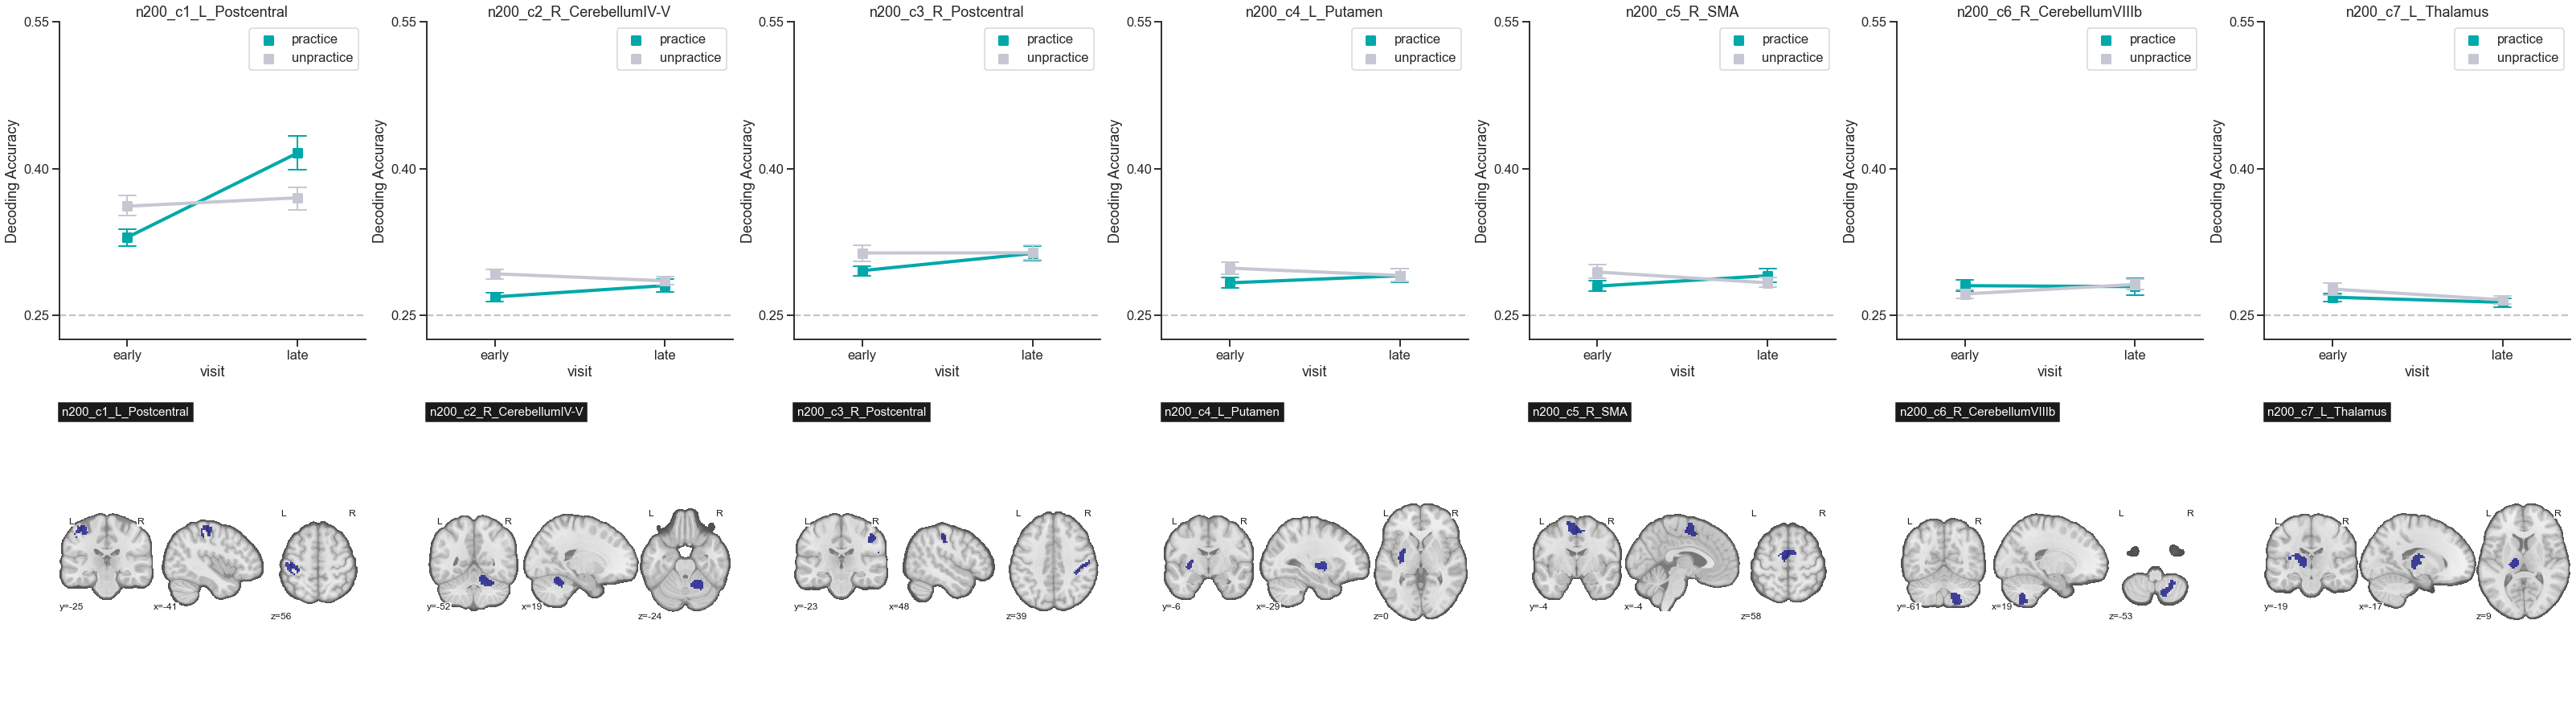

In [10]:
GA.draw_lineplots_and_rois(magnitude=8, n_columns=7, img_bg=img_bg)

In [8]:
GA.do_paired_ttest('early_practice','late_practice')

,ROI,cond_A,cond_B,t-statistic,Two-sided p-value,rejected,pvalue-corrected
0,n200_c1_L_Postcentral,early_practice,late_practice,-4.574044,0.000083,True,0.000083
1,n200_c2_R_CerebellumIV-V,early_practice,late_practice,-1.865849,0.072207,False,0.072207
2,n200_c3_R_Postcentral,early_practice,late_practice,-1.926143,0.063940,False,0.063940
3,n200_c4_L_Putamen,early_practice,late_practice,-0.863909,0.394728,False,0.394728
4,n200_c5_R_SMA,early_practice,late_practice,-1.338056,0.191276,False,0.191276
5,n200_c6_R_CerebellumVIIIb,early_practice,late_practice,0.097040,0.923362,False,0.923362
6,n200_c7_L_Thalamus,early_practice,late_practice,0.832935,0.411689,False,0.411689


In [9]:
GA.do_paired_ttest('early_practice','early_unpractice')

,ROI,cond_A,cond_B,t-statistic,Two-sided p-value,rejected,pvalue-corrected
0,n200_c1_L_Postcentral,early_practice,early_unpractice,-2.810440,0.008773,False,0.008773
1,n200_c2_R_CerebellumIV-V,early_practice,early_unpractice,-3.244826,0.002959,True,0.002959
2,n200_c3_R_Postcentral,early_practice,early_unpractice,-1.859598,0.073115,False,0.073115
3,n200_c4_L_Putamen,early_practice,early_unpractice,-1.900152,0.067397,False,0.067397
4,n200_c5_R_SMA,early_practice,early_unpractice,-1.781301,0.085341,False,0.085341
5,n200_c6_R_CerebellumVIIIb,early_practice,early_unpractice,1.298888,0.204216,False,0.204216
6,n200_c7_L_Thalamus,early_practice,early_unpractice,-1.218488,0.232859,False,0.232859


In [10]:
GA.do_paired_ttest('late_practice','late_unpractice')

,ROI,cond_A,cond_B,t-statistic,Two-sided p-value,rejected,pvalue-corrected
0,n200_c1_L_Postcentral,late_practice,late_unpractice,3.154366,0.003728,True,0.003728
1,n200_c2_R_CerebellumIV-V,late_practice,late_unpractice,-0.597574,0.554762,False,0.554762
2,n200_c3_R_Postcentral,late_practice,late_unpractice,-0.074177,0.941379,False,0.941379
3,n200_c4_L_Putamen,late_practice,late_unpractice,-0.033267,0.973689,False,0.973689
4,n200_c5_R_SMA,late_practice,late_unpractice,1.001306,0.324961,False,0.324961
5,n200_c6_R_CerebellumVIIIb,late_practice,late_unpractice,-0.232368,0.817884,False,0.817884
6,n200_c7_L_Thalamus,late_practice,late_unpractice,-0.402506,0.690263,False,0.690263


In [11]:
GA.make_wit_mean_ttest(stage='early_practice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,n200_c1_L_Postcentral,early,practice,8.703611,1.394858e-09,True,1.394858e-09
1,n200_c2_R_CerebellumIV-V,early,practice,3.806147,6.754291e-04,True,6.754291e-04
2,n200_c3_R_Postcentral,early,practice,9.022293,6.455393e-10,True,6.455393e-10
3,n200_c4_L_Putamen,early,practice,6.371906,5.772277e-07,True,5.772277e-07
4,n200_c5_R_SMA,early,practice,5.639728,4.297449e-06,True,4.297449e-06
5,n200_c6_R_CerebellumVIIIb,early,practice,5.129903,1.767790e-05,True,1.767790e-05
6,n200_c7_L_Thalamus,early,practice,4.464133,1.121099e-04,True,1.121099e-04


## My replicated ROIs from localizers

In [18]:
## ROI
GA.roi_imgs = {}
path_list = sorted(glob(join(GA.dir_mask,'localizer_sampark','n*.nii.gz')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = niimg.load_img(path)
GA.roi_imgs

{'n200.L_Thalamus.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e7c10>,
 'n200.R_CerebellumVIIIb.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e7f40>,
 'n200.R_Postcentral.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e76a0>,
 'n201.L_Postcentral.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e7250>,
 'n202.R_CerebellumIV-V.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e7ac0>,
 'n202.S_SMA.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f8461e08df0>,
 'n225.L_Putamen.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84538a24c0>}

n200.L_Thalamus.nii.gz(n_voxles=200)
n200.R_CerebellumVIIIb.nii.gz(n_voxles=200)
n200.R_Postcentral.nii.gz(n_voxles=200)
n201.L_Postcentral.nii.gz(n_voxles=201)
n202.R_CerebellumIV-V.nii.gz(n_voxles=202)
n202.S_SMA.nii.gz(n_voxles=202)
n225.L_Putamen.nii.gz(n_voxles=225)


0

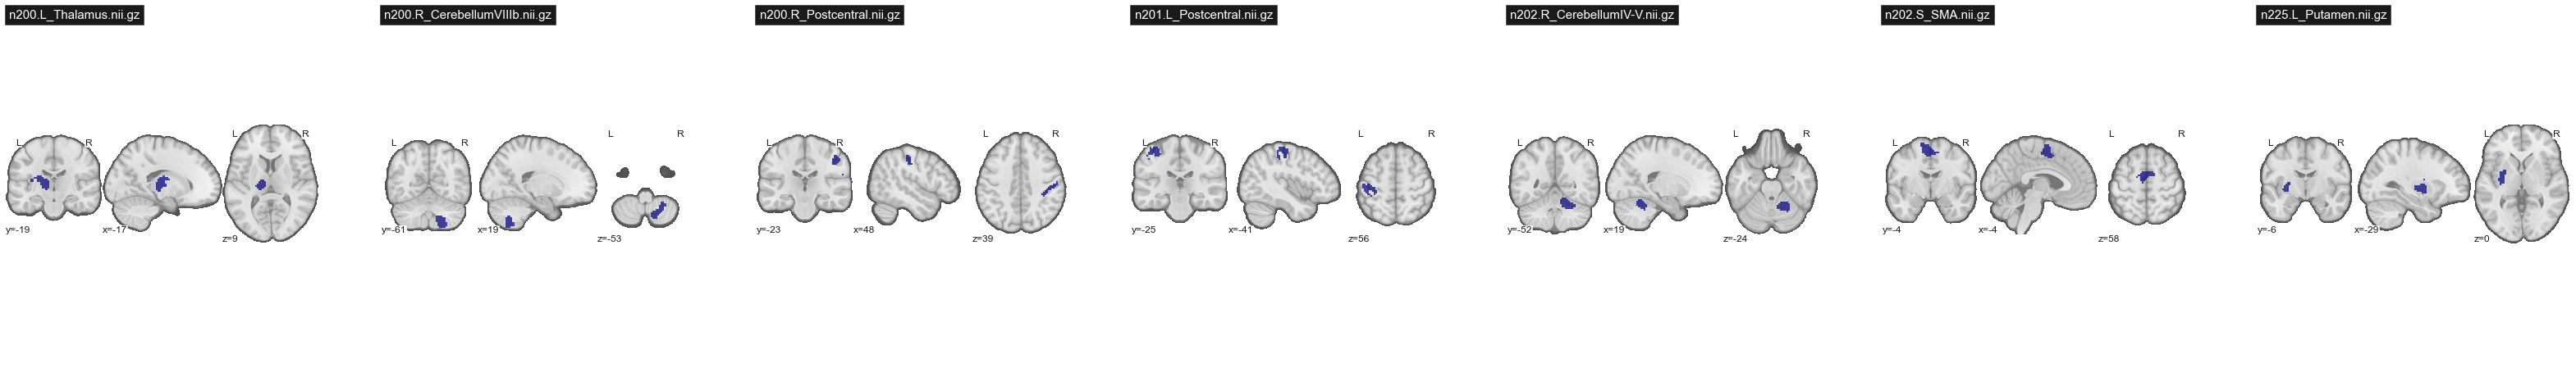

In [19]:
GA.draw_rois(magnitude=8, n_columns=7, img_bg=img_bg)

## Default Mode Network

In [20]:
GA.roi_imgs = {}

## DMN regions(global)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_dmn, name+'.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)
        
# ## DMN regions(detail)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_dmn, name+'_*.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

GA.roi_imgs

{'Core': <nibabel.nifti1.Nifti1Image at 0x7f8471b66dc0>,
 'dMsub': <nibabel.nifti1.Nifti1Image at 0x7f8471b66070>,
 'MTLsub': <nibabel.nifti1.Nifti1Image at 0x7f8471b66cd0>,
 'Core_PCC_l': <nibabel.nifti1.Nifti1Image at 0x7f8450c7f430>,
 'Core_PCC_r': <nibabel.nifti1.Nifti1Image at 0x7f8450c7ffa0>,
 'Core_aMPFC_l': <nibabel.nifti1.Nifti1Image at 0x7f8471b66ca0>,
 'Core_aMPFC_r': <nibabel.nifti1.Nifti1Image at 0x7f84425bf5b0>,
 'dMsub_LTC_l': <nibabel.nifti1.Nifti1Image at 0x7f84425bf5e0>,
 'dMsub_LTC_r': <nibabel.nifti1.Nifti1Image at 0x7f84425bfbb0>,
 'dMsub_TPJ_l': <nibabel.nifti1.Nifti1Image at 0x7f84425bfe50>,
 'dMsub_TPJ_r': <nibabel.nifti1.Nifti1Image at 0x7f8473236670>,
 'dMsub_TempP_l_temp': <nibabel.nifti1.Nifti1Image at 0x7f8473236e50>,
 'dMsub_TempP_r_temp': <nibabel.nifti1.Nifti1Image at 0x7f8473236850>,
 'dMsub_dMPFC': <nibabel.nifti1.Nifti1Image at 0x7f84732365e0>,
 'MTLsub_HF_l': <nibabel.nifti1.Nifti1Image at 0x7f8473221a90>,
 'MTLsub_HF_r': <nibabel.nifti1.Nifti1Image 

In [22]:
## Core
img_sum = nilearn.image.math_img(
    formula="img1+img2+img3+img4 > 0",
    img1=GA.roi_imgs['Core_PCC_l'], img2=GA.roi_imgs['Core_PCC_r'], img3=GA.roi_imgs['Core_aMPFC_l'], img4=GA.roi_imgs['Core_aMPFC_r']
)
img_res = nilearn.image.math_img(formula="img1-img2", img1=GA.roi_imgs['Core'], img2=img_sum)
img_res.get_fdata().sum()

0.0

In [23]:
## MTL
img_sum = nilearn.image.math_img(
    formula="img1+img2+img3+img4+img5+img6+img7+img8+img9 > 0",
    img1=GA.roi_imgs['MTLsub_HF_l'], img2=GA.roi_imgs['MTLsub_HF_r']
    , img3=GA.roi_imgs['MTLsub_PHC_l'], img4=GA.roi_imgs['MTLsub_PHC_r']
    , img5=GA.roi_imgs['MTLsub_Rsp_l'], img6=GA.roi_imgs['MTLsub_Rsp_r']
    , img7=GA.roi_imgs['MTLsub_pIPL_l'], img8=GA.roi_imgs['MTLsub_pIPL_r']
    , img9=GA.roi_imgs['MTLsub_vMPFC']
)
img_res = nilearn.image.math_img(formula="img1-img2", img1=GA.roi_imgs['MTLsub'], img2=img_sum)
img_res.get_fdata().sum()

0.0

In [25]:
## DMPFC
img_sum = nilearn.image.math_img(
    formula="img1+img2+img3+img4+img5+img6+img7 > 0",
    img1=GA.roi_imgs['dMsub_LTC_l'], img2=GA.roi_imgs['dMsub_LTC_r']
    , img3=GA.roi_imgs['dMsub_TPJ_l'], img4=GA.roi_imgs['dMsub_TPJ_r']
    , img5=GA.roi_imgs['dMsub_TempP_l_temp'], img6=GA.roi_imgs['dMsub_TempP_r_temp']
    , img7=GA.roi_imgs['dMsub_dMPFC']
)
img_res = nilearn.image.math_img(formula="img1-img2", img1=GA.roi_imgs['dMsub'], img2=img_sum)
img_res.get_fdata().sum()

0.0

### The Classification Accuracies of the above ROIs

### *Calculation
*run once

In [6]:
for subj in GA.list_subj:
    betas = {}    ## memory reduction
    for stage in GA.list_stage:
        beta = GA.load_beta(subj, stage)
        betas[subj, stage] = beta[subj, stage]
    GA.cross_valid(betas, roi_imgs, GA.lda)

In [7]:
## save the result
pkl_name = 'DMN'
with open(join(GA.dir_script, today+'_%s.pkl'%pkl_name),"wb") as fw:
    pickle.dump(GA.scores, fw)

### Wit dataframe

In [13]:
## compare by type
pkl_name = 'DMN'
temp = GA.show_pkl_list(GA.dir_script, pkl_name)
temp

,name,identity
0,20210426_DMN.pkl,a


In [14]:
## load scores
with open(join(GA.dir_script,temp.loc[0,'name']),"rb") as fr:
    GA.scores = pickle.load(file=fr)

In [15]:
GA.make_wit_score()

,subj,ROI,visit,mapping,accuracy_1,accuracy_2,accuracy_3,mean_accuracy
0,01,Core,early,practice,0.447917,0.333333,0.270833,0.350694
1,01,dMsub,early,practice,0.354167,0.260417,0.385417,0.333333
2,01,MTLsub,early,practice,0.406250,0.333333,0.302083,0.347222
3,01,Core_PCC_l,early,practice,0.312500,0.333333,0.291667,0.312500
4,01,Core_PCC_r,early,practice,0.364583,0.458333,0.291667,0.371528
...,...,...,...,...,...,...,...,...
2755,44,MTLsub_Rsp_l,late,unpractice,0.354167,0.427083,0.406250,0.395833
2756,44,MTLsub_Rsp_r,late,unpractice,0.395833,0.395833,0.354167,0.381944
2757,44,MTLsub_pIPL_l,late,unpractice,0.270833,0.250000,0.354167,0.291667
2758,44,MTLsub_pIPL_r,late,unpractice,0.281250,0.354167,0.343750,0.326389


Core(n_voxles=760)
dMsub(n_voxles=1166)
MTLsub(n_voxles=1766)
Core_PCC_l(n_voxles=203)
Core_PCC_r(n_voxles=203)
Core_aMPFC_l(n_voxles=203)
Core_aMPFC_r(n_voxles=203)
dMsub_LTC_l(n_voxles=196)
dMsub_LTC_r(n_voxles=193)
dMsub_TPJ_l(n_voxles=203)
dMsub_TPJ_r(n_voxles=202)
dMsub_TempP_l_temp(n_voxles=79)
dMsub_TempP_r_temp(n_voxles=90)
dMsub_dMPFC(n_voxles=203)
MTLsub_HF_l(n_voxles=203)
MTLsub_HF_r(n_voxles=203)
MTLsub_PHC_l(n_voxles=203)
MTLsub_PHC_r(n_voxles=203)
MTLsub_Rsp_l(n_voxles=203)
MTLsub_Rsp_r(n_voxles=203)
MTLsub_pIPL_l(n_voxles=187)
MTLsub_pIPL_r(n_voxles=170)
MTLsub_vMPFC(n_voxles=191)


0

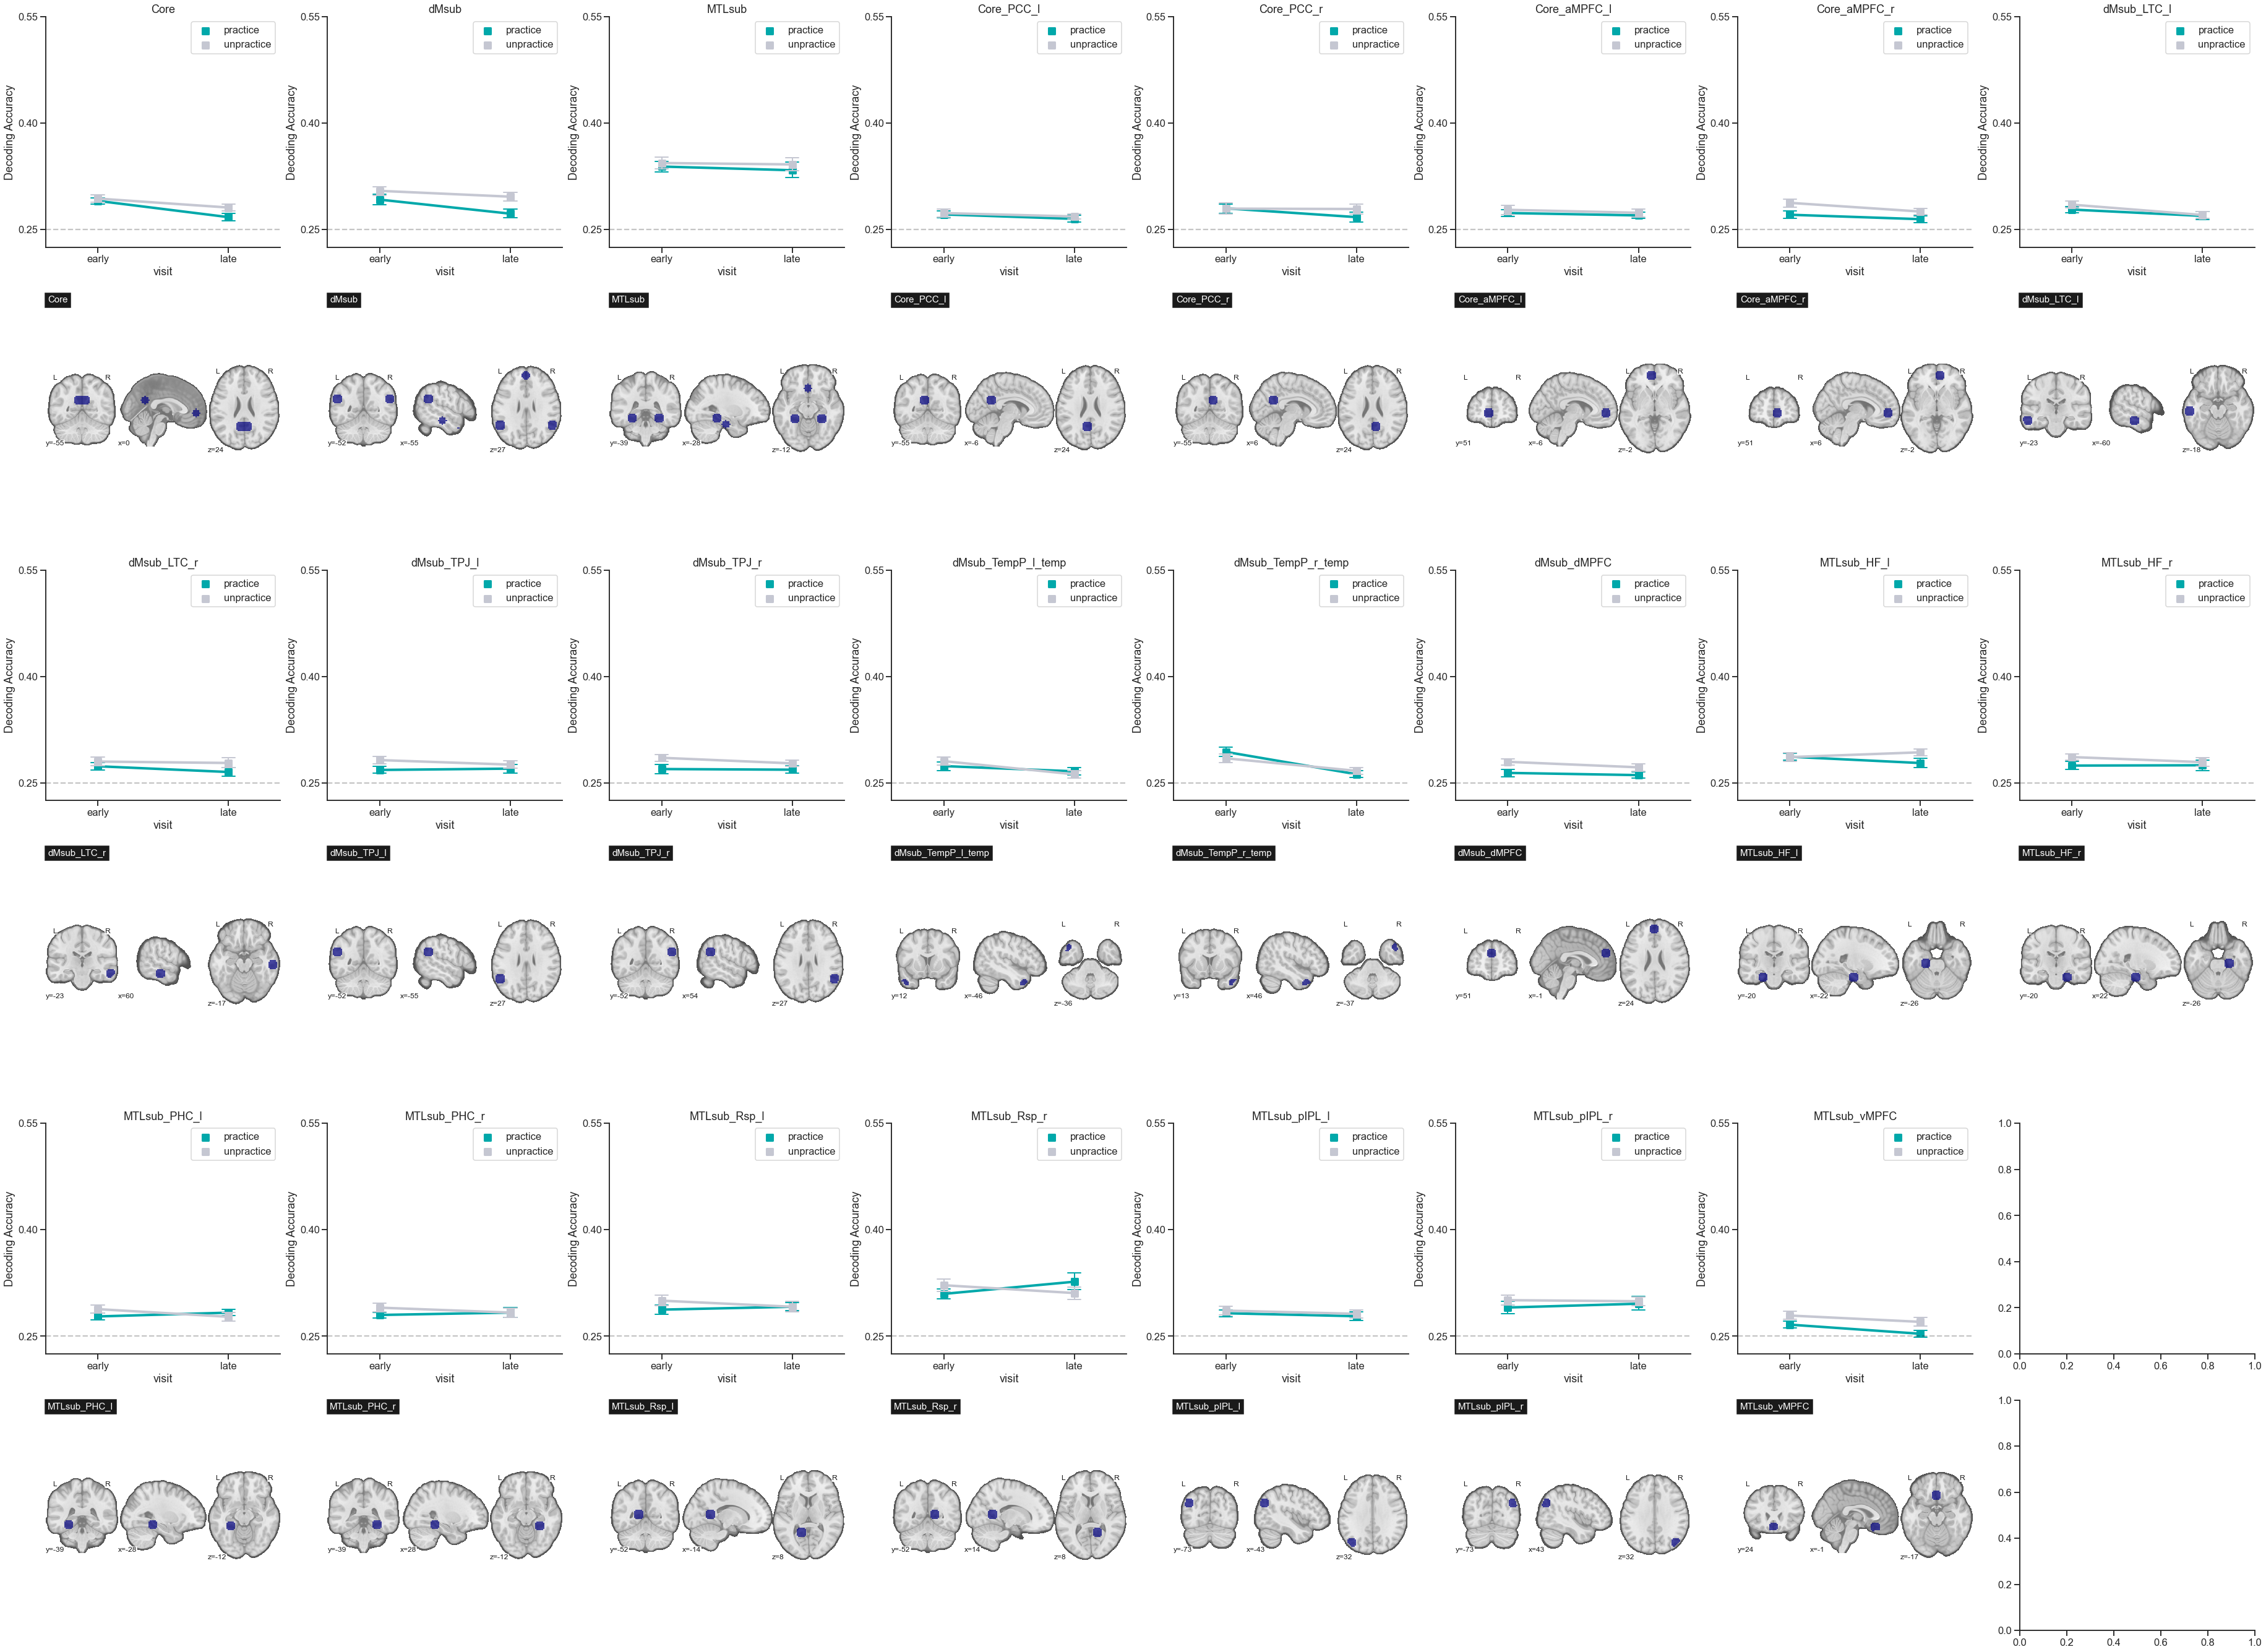

In [17]:
GA.draw_lineplots_and_rois(magnitude=8, n_columns=8, img_bg=img_bg)

In [16]:
GA.make_wit_mean_ttest(stage='early_practice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,Core,early,practice,9.557470,1.824209e-10,True,1.824209e-10
1,dMsub,early,practice,5.784743,2.879420e-06,True,2.879420e-06
2,MTLsub,early,practice,12.597609,2.757169e-13,True,2.757169e-13
3,Core_PCC_l,early,practice,4.362740,1.482769e-04,True,1.482769e-04
4,Core_PCC_r,early,practice,4.341874,1.570437e-04,True,1.570437e-04
5,Core_aMPFC_l,early,practice,4.303960,1.743049e-04,True,1.743049e-04
6,Core_aMPFC_r,early,practice,3.927922,4.863837e-04,True,4.863837e-04
7,dMsub_LTC_l,early,practice,5.661731,4.043830e-06,True,4.043830e-06
8,dMsub_LTC_r,early,practice,4.401646,1.332044e-04,True,1.332044e-04
9,dMsub_TPJ_l,early,practice,3.793944,6.979319e-04,True,6.979319e-04


In [17]:
GA.make_wit_mean_ttest(stage='late_practice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,Core,late,practice,3.259191,2.851428e-03,True,2.851428e-03
1,dMsub,late,practice,3.605832,1.152894e-03,True,1.152894e-03
2,MTLsub,late,practice,7.334242,4.439901e-08,True,4.439901e-08
3,Core_PCC_l,late,practice,3.032346,5.071951e-03,False,5.071951e-03
4,Core_PCC_r,late,practice,2.409334,2.255634e-02,False,2.255634e-02
5,Core_aMPFC_l,late,practice,4.343465,1.563576e-04,True,1.563576e-04
6,Core_aMPFC_r,late,practice,2.814923,8.677852e-03,False,8.677852e-03
7,dMsub_LTC_l,late,practice,3.284316,2.672876e-03,True,2.672876e-03
8,dMsub_LTC_r,late,practice,2.473395,1.948431e-02,False,1.948431e-02
9,dMsub_TPJ_l,late,practice,3.271388,2.763364e-03,True,2.763364e-03


In [18]:
GA.make_wit_mean_ttest(stage='early_unpractice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,Core,early,unpractice,7.740036,1.553432e-08,True,1.553432e-08
1,dMsub,early,unpractice,8.474080,2.449785e-09,True,2.449785e-09
2,MTLsub,early,unpractice,10.933011,8.399663e-12,True,8.399663e-12
3,Core_PCC_l,early,unpractice,3.924405,4.910333e-04,True,4.910333e-04
4,Core_PCC_r,early,unpractice,3.691938,9.169841e-04,True,9.169841e-04
5,Core_aMPFC_l,early,unpractice,4.261510,1.958627e-04,True,1.958627e-04
6,Core_aMPFC_r,early,unpractice,6.662575,2.633160e-07,True,2.633160e-07
7,dMsub_LTC_l,early,unpractice,7.319123,4.618827e-08,True,4.618827e-08
8,dMsub_LTC_r,early,unpractice,4.670282,6.337284e-05,True,6.337284e-05
9,dMsub_TPJ_l,early,unpractice,5.507394,6.198612e-06,True,6.198612e-06


In [19]:
GA.make_wit_mean_ttest(stage='late_unpractice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,Core,late,unpractice,5.967202,1.742827e-06,True,1.742827e-06
1,dMsub,late,unpractice,7.205886,6.214671e-08,True,6.214671e-08
2,MTLsub,late,unpractice,9.895958,8.362789e-11,True,8.362789e-11
3,Core_PCC_l,late,unpractice,5.210050,1.414794e-05,True,1.414794e-05
4,Core_PCC_r,late,unpractice,4.383198,1.401521e-04,True,1.401521e-04
5,Core_aMPFC_l,late,unpractice,4.046538,3.525206e-04,True,3.525206e-04
6,Core_aMPFC_r,late,unpractice,5.957458,1.790087e-06,True,1.790087e-06
7,dMsub_LTC_l,late,unpractice,4.301571,1.754533e-04,True,1.754533e-04
8,dMsub_LTC_r,late,unpractice,3.986712,4.147579e-04,True,4.147579e-04
9,dMsub_TPJ_l,late,unpractice,4.854972,3.795698e-05,True,3.795698e-05


In [20]:
GA.do_paired_ttest('early_practice','late_practice')

,ROI,cond_A,cond_B,t-statistic,Two-sided p-value,rejected,pvalue-corrected
0,Core,early_practice,late_practice,3.047261,0.004886,True,0.004886
1,dMsub,early_practice,late_practice,2.139986,0.040898,False,0.040898
2,MTLsub,early_practice,late_practice,0.412475,0.683024,False,0.683024
3,Core_PCC_l,early_practice,late_practice,0.887490,0.382117,False,0.382117
4,Core_PCC_r,early_practice,late_practice,1.304728,0.202245,False,0.202245
5,Core_aMPFC_l,early_practice,late_practice,0.494325,0.624801,False,0.624801
6,Core_aMPFC_r,early_practice,late_practice,0.985765,0.332402,False,0.332402
7,dMsub_LTC_l,early_practice,late_practice,1.256302,0.219033,False,0.219033
8,dMsub_LTC_r,early_practice,late_practice,0.948530,0.350698,False,0.350698
9,dMsub_TPJ_l,early_practice,late_practice,-0.244800,0.808335,False,0.808335


## Ventral visual stream (TT_Daemon, Brodmann Area)

In [5]:
GA.roi_imgs = {}
path_list = glob(join(GA.dir_mask, 'TT_Daemon', '*.brik1.BA???.*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[2]
    GA.roi_imgs[fname] = nilearn.image.load_img(path)
GA.roi_imgs

{'BA17L': <nibabel.nifti1.Nifti1Image at 0x7fad7873b670>,
 'BA17R': <nibabel.nifti1.Nifti1Image at 0x7fad7873b730>,
 'BA18L': <nibabel.nifti1.Nifti1Image at 0x7fad7873b700>,
 'BA18R': <nibabel.nifti1.Nifti1Image at 0x7fad69310a30>,
 'BA19L': <nibabel.nifti1.Nifti1Image at 0x7fad69310eb0>,
 'BA19R': <nibabel.nifti1.Nifti1Image at 0x7fad693b3460>,
 'BA20L': <nibabel.nifti1.Nifti1Image at 0x7fad693b34f0>,
 'BA20R': <nibabel.nifti1.Nifti1Image at 0x7fad693b3880>,
 'BA37L': <nibabel.nifti1.Nifti1Image at 0x7fad693b3c10>,
 'BA37R': <nibabel.nifti1.Nifti1Image at 0x7fad693b39d0>,
 'BA38L': <nibabel.nifti1.Nifti1Image at 0x7fad693b63a0>,
 'BA38R': <nibabel.nifti1.Nifti1Image at 0x7fad693b6730>}

BA17L(n_voxles=157)
BA17R(n_voxles=151)
BA18L(n_voxles=724)
BA18R(n_voxles=717)
BA19L(n_voxles=761)
BA19R(n_voxles=800)
BA20L(n_voxles=360)
BA20R(n_voxles=359)
BA37L(n_voxles=308)
BA37R(n_voxles=302)
BA38L(n_voxles=304)
BA38R(n_voxles=302)


0

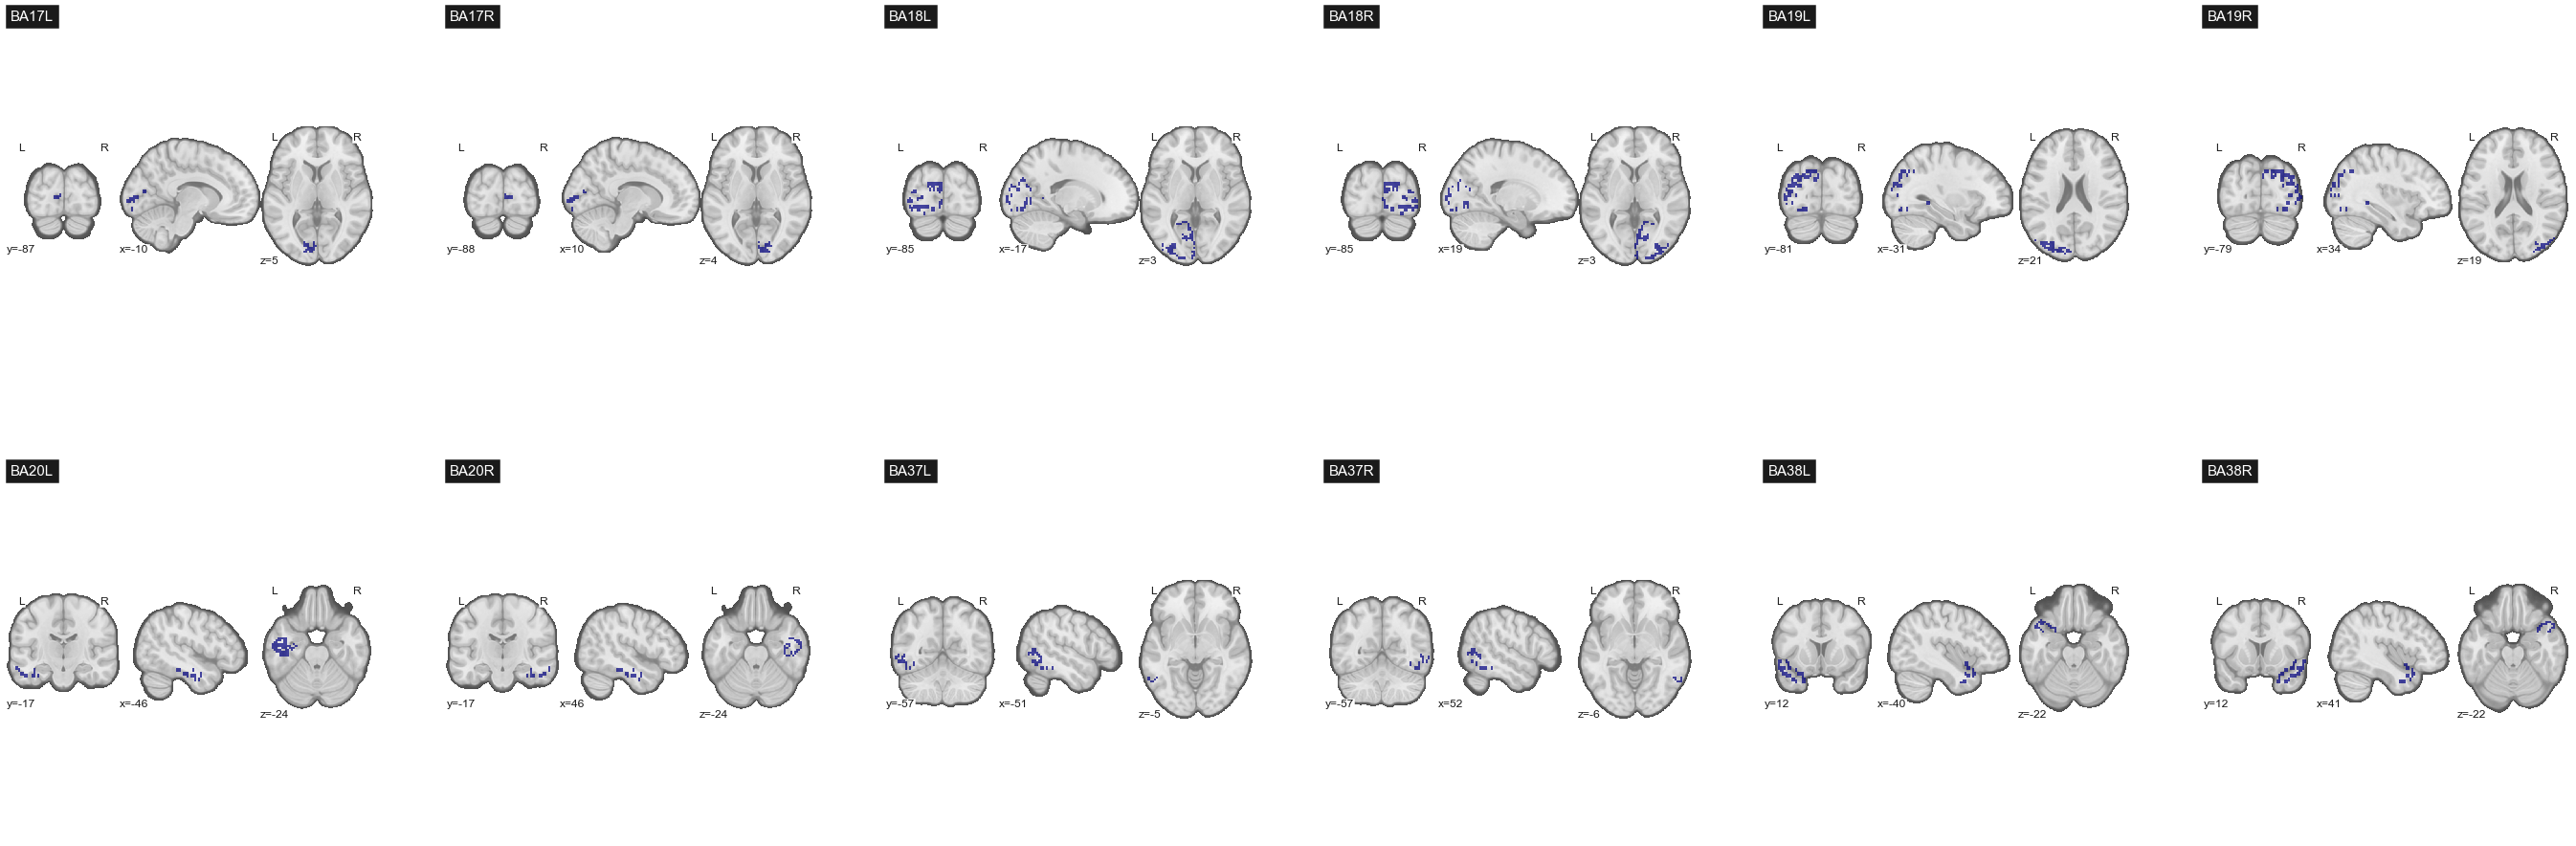

In [6]:
GA.draw_rois(magnitude=8, n_columns=6, img_bg=img_bg)

## Fan280

In [14]:
fan_imgs={}
path_list = glob(join(GA.dir_mask,'fan280','*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[-1]
    fan_imgs[fname] = nilearn.image.load_img(path)

# Searchlight